#DALL-E 2.5D: Depth Warped Zoom Notebook - v1
####Notebook authored by [@deKxi][1], feel free to tweet @ or DM me if you have any feedback/questions, or if you just make some cool stuff with it! Hope you enjoy :)


---


## Instructions
Cells that are important for using the notebook have **-| dashes and pipes |-** on either side. The rest can be kept closed to minimize clutter.
0. Configure Parameters - namely the ones under the **Depth Controls** section 
1. Click Runtime->Restart and run all
2. Upload starting image when prompted (in the **Upload Image** section)
3. After the sequence has generated, open /content/out_imgs and download the latest 'To-DALLE_000xx.png' image (it should auto download anyway but if it doesn't that's the filepath - make sure you let chrome 'Allow multiple downloads' on this page.
4. Upload the image to DALL-E 2 and click to Edit the image, then follow standard outcrop process
 - Don't know how? [Check out this thread here][2] (shout out to [@KyrickYoung][3]!), or check out [my simple outcrop guide][4], or [@GuyP's much more elaborate guide][5].
5. Download the image - Preferably download the .webm file through Chrome's inspect element window (F12) as it won't have the watermark this way (see below image).
6. Repeat from step 0 - Modify params, Restart and run all, Upload the latest DALL-E 2 image, etc.
7. Finished video will be found at /content/output_video.mp4, while just the latest image sequence will be at /content/latest_sequence.mp4



- You can redo the current sequence with different setting by just rerunning the **Params** cell to change the depth controls, followed by running the **Warp Image & Generate Sequence** cell
- To redo a previous sequence that isn't the immediate previous, simply delete all 'To-DALLE_000xx.png' images until the frame corresponding to the start of the desired sequence in the /content/out_imgs/ folder, and **Upload** the image for the start of that sequence; the notebook will continue from the last found 'To-DALLE_000xx.png' image, overwriting frames as necessary 
 - Be aware that if it finishes early due to finding transparency in a frame, it won't remove any frames after that last frame - be sure to delete those if generating your video as they will be included in the video otherwise, or simply continue zooming with new images to overwrite them.

---
### Important Notes:
- I recommend periodically downloading your frames from /content/out_imgs for longer videos, as Colab has a nasty habit of kicking people off randomly. I'll add Google Drive support in the next version so you can resume a previous run without the hassle :)
- This warp technique is displacement based (so it's really 2.5D, not full 3D), and as a result has some quirks you wouldn't see in a proper 3D reconstruction technique. 
 - Sometimes objects in the frame can split or warp in strange / undesirable ways - you can try to minimize weirdness of a particular object/area by adjusting the controls under **Depth Controls** to move the warp middle-point and direction - moving a particular subject/area to the middle will keep that area relatively normal while the rest of the frame stretches instead.
- This technique is still prone to the typical problems associated with outcropping, such as artifacting and style drift - realistic styles are much harder to keep consistent across a full video and will use far more DALL-E 2 credits, so I'd highly recommend planning your theme/styles around these limitations!


Want to contribute to the project? Feel free to commit request or start a new branch on the [Github page!][0]

[0]: https://github.com/deKxi/DALL-E_2.5D
[1]: https://twitter.com/deKxi
[2]: https://twitter.com/KyrickYoung/status/1541095601840037888
[3]: https://twitter.com/KyrickYoung
[4]: https://drive.google.com/file/u/1/d/10T3xRZSgkdy_R5b1ZfowZVENzazpBf1F/view
[5]: https://twitter.com/GuyP/status/1547234780001042432

###**To find the image without a watermark, search (Ctrl+F) "Generated by" in the inspect element (F12) window.**
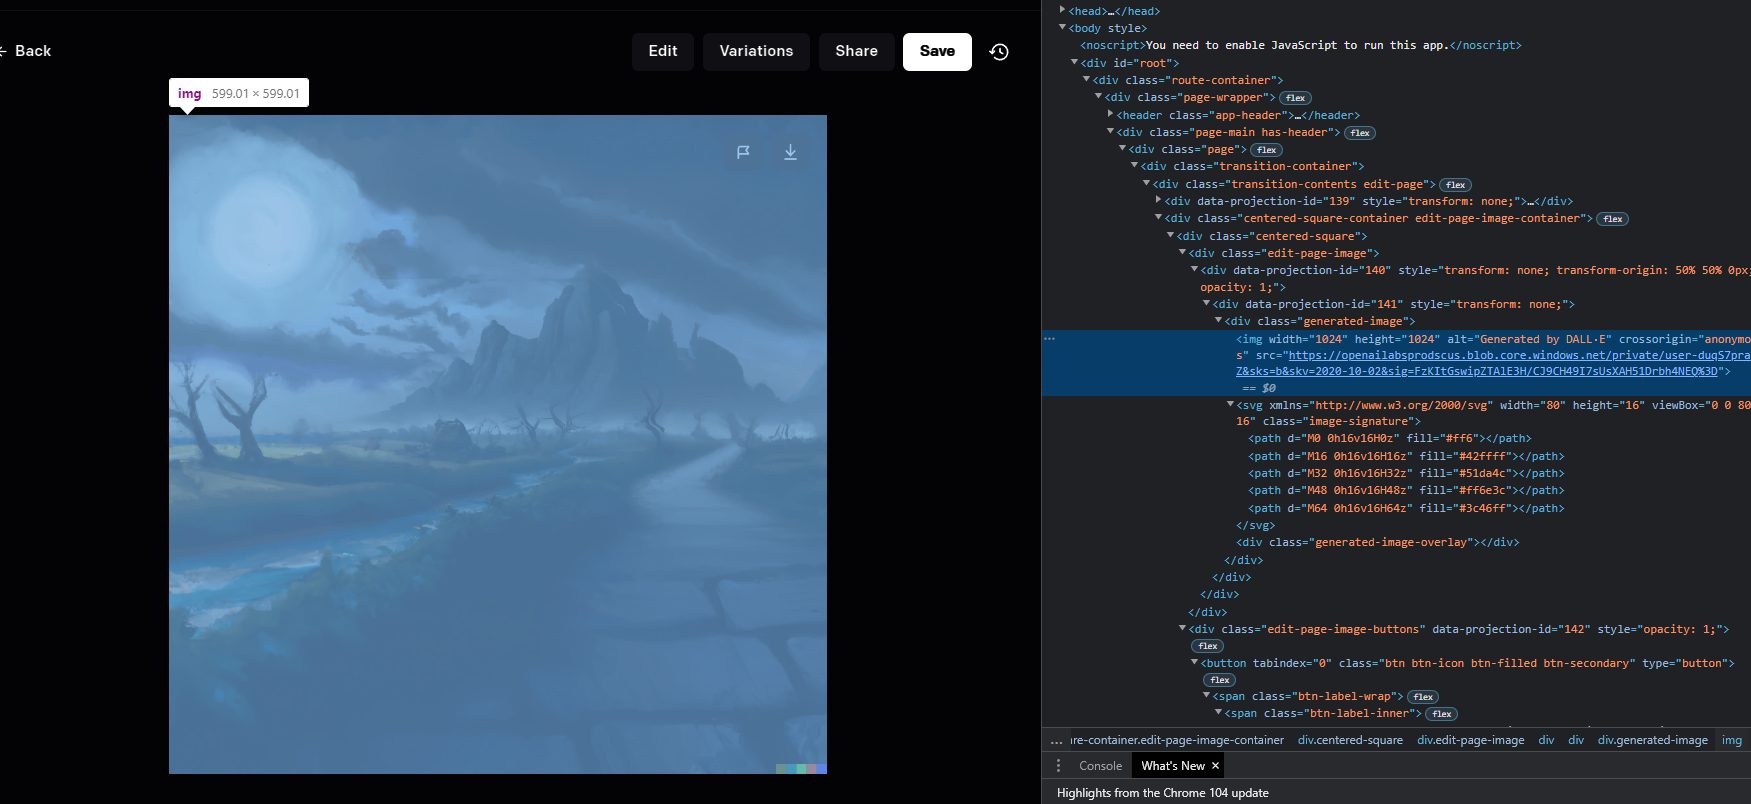
*Dark theme from Chrome extension Dark Reader.*

--- 
##Changelog:
####v1.0
- First Release - Lucky you! You get to be the guinea pig discovering all the bugs and broken features! :D


####Next version(s) will include: 
- Google Drive support
- More warp types to give better zoom capabilities
- Some more options for upscaling
- Discard partially transparent pixels that can sometimes cause seams when outcropping with DALL-E 2


---
##Recommended Software:
- [FlowFrames][0] - (Free) GUI software package for frame interpolation, use RIFE 2.3 for best results. **I highly recommend you get this** or a comparable frame interpolation solution as it smooths out many temporal artifacts and allows for slower speeds without the popping artifacts on the sides of the frame.
 - If you aren't using a frame interpolator, make sure you set the framerate and sequence length accordingly!
- [Topaz Gigapixel][1] - (Paid) Upscaler I use on my DALL-E 2 outputs instead of ERSGAN, better results than the one in this notebook and has heaps of settings to fine tune. Not essential, but gives much higher quality results and less temporal artifacts in the final video.
 - If using Gigapixel, be sure to disable the upscaler in this notebook!

[0]: https://github.com/n00mkrad/flowframes
[1]: https://www.topazlabs.com/gigapixel-ai

---
##Credits & Libraries used:

Depth Models:
- [Boosting Monocular Depth Estimation Models to High-Resolution via Content-Adaptive Multi-Resolution Merging][1]
 - [LeReS][2]
 - [MiDas][3]

Upscaler Models:
- [SwinIR Online Demo comparison with BSRGAN (ICCV2021) and Real-ESRGAN][4]
 - [Real-ESRGAN][5]
 - [Swin-IR][6]


Displacement Warp: 
- Original implementation by [@deKxi][7]
- Optimizations by [@eps696][8] 
- [Original Implementation in Illustrip3D, maintained by @eps696][9]

Transparency detect code from [user 'vinyl-da-igyu-kazotetsu' on StackOverflow][10]

---


[1]: https://github.com/compphoto/BoostingMonocularDepth
[2]: https://github.com/aim-uofa/AdelaiDepth/tree/main/LeReS
[3]: https://github.com/isl-org/MiDaS/tree/v2
[4]: https://colab.research.google.com/gist/JingyunLiang/a5e3e54bc9ef8d7bf594f6fee8208533/swinir-demo-on-real-world-image-sr.ipynb
[5]: https://github.com/xinntao/Real-ESRGAN
[6]: https://github.com/JingyunLiang/SwinIR
[7]: https://twitter.com/deKxi
[8]: https://twitter.com/eps696
[9]: https://colab.research.google.com/github/eps696/aphantasia/blob/master/IllusTrip3D.ipynb
[10]: https://stackoverflow.com/questions/43864101/python-pil-check-if-image-is-transparent

# Download Requirements

In [ ]:
import os
force_dl_reqs = False #@param{type:"boolean"}
#@markdown - Requirements should download automatically but if they don't and you get an error for missing pth/pt files, check this box and Runtime->Restart and Run All
if not os.path.isdir('/content/BoostingMonocularDepth/') or force_dl_reqs:
  ##### Depth Model

  # Clone git repo
  !git clone https://github.com/compphoto/BoostingMonocularDepth.git

  !wget https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth
  #!gdown https://drive.google.com/u/0/uc?id=1cU2y-kMbt0Sf00Ns4CN2oO9qPJ8BensP&export=download

  # Downloading merge model weights
  !mkdir -p /content/BoostingMonocularDepth/pix2pix/checkpoints/mergemodel/
  !mv latest_net_G.pth /content/BoostingMonocularDepth/pix2pix/checkpoints/mergemodel/

  # Downloading Midas weights
  !wget https://github.com/AlexeyAB/MiDaS/releases/download/midas_dpt/midas_v21-f6b98070.pt
  !mv midas_v21-f6b98070.pt /content/BoostingMonocularDepth/midas/model.pt

  # # Downloading LeRes weights
  !wget https://cloudstor.aarnet.edu.au/plus/s/lTIJF4vrvHCAI31/download
  !mv download /content/BoostingMonocularDepth/res101.pth

  ##### Upscaler

  # Clone realESRGAN
  !git clone https://github.com/xinntao/Real-ESRGAN.git
  %cd Real-ESRGAN

  !mkdir in_imgs/
  print(os.getcwd())
  # Set up the environment
  !pip install basicsr
  !pip install facexlib
  !pip install gfpgan
  !pip install -r requirements.txt
  !python setup.py develop

  # Clone BSRGAN
  !git clone https://github.com/cszn/BSRGAN.git

  !rm -r SwinIR
  # Clone SwinIR
  !git clone https://github.com/JingyunLiang/SwinIR.git
  !pip install timm

  # Download the pre-trained models
  !wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

  %cd ..
  print(os.getcwd())


# **-| Params |-**

In [ ]:
global frames_per_sequence, horizontal_direction, vertical_direction, warp_strength, depth_model, maximum_size, minimum_size, depth_midpoint

#@markdown #Models
#@markdown **Depth Model**
depth_model = 'LeRes' #@param ["LeRes","MiDas"]
#@markdown - LeRes is substantially better but falls under a non-commercial licence, use MiDas for commercial.

#@markdown **Upscaler Model**
upscale_model = 'Ersgan' #@param ["Ersgan", "Off"]
#@markdown - RealESRGAN is the only model implemented currently - it's not great for this purpose so I may look into implementing others too. 
#@markdown - Set to *Off* if the image you are uploading has already been upscaled to 2048 (for example: if you use Topaz Gigapixel locally like I do)

#@markdown **test_patch_wise**
test_patch_wise = True#@param {type:"boolean"}
#@markdown - For ERSGAN, no idea what it does because I haven't experimented with it and not looked into what it does, it might make the upscale result better or worse. 🤷‍♂️ Toggle on your own volition
#@markdown ---
#@markdown #Sequence Parameters
#@markdown 'Sequence' refers to *just* the frames generated for each outcrop image and *not* the entire video.

#@markdown **Per-Image/Outcrop Sequence Length**
frames_per_sequence = 24#@param {type:"integer"}
#@markdown - How many max frames per image /sequence we will generate between inpaint/outcrops. 
#@markdown  - This is a 'Maximum' value, because depth warp *will* finish early if there are any transparent pixels found in an image - which is usually the case with most depth settings.
#@markdown - Recommended values are between 30 and 5, combined with frame interpolation to generate intermediate frames. Increase if not using interpolation (but expect some temporal artifacts near the frame edges)
#@markdown  - Larger values will = slower zoom - too high will result in slight 'popping' of new content near the edges of the frame on every inpaint. 
#@markdown  - Low values will = faster zoom - too low will produce artifacts when frame interpolating. 

#@markdown **Video Framerate**
vid_frames_per_second = 12#@param {type:"integer"}
#@markdown - FPS of the output video

#@markdown **Image Size**
maximum_size = 2048#@param {type:"integer"}
minimum_size = 1024#@param {type:"integer"}
#@markdown - Size will influence zoom intensity and inpaint/outcrop amount. 2048 is ideal maximum, other values are untested. Leave minimum as 1024 since that's DALL-E 2's output resolution

#@markdown ---
#@markdown #Depth & 'Camera' Parameters
#@markdown These can be a little finicky, may take some trial and error to master if perfection is your goal.
#@markdown - Adjusting these value will alter how many frames are generated in a sequence, as they can result in transparency in frames earlier or later than the set number in *frames_per_sequence*.

#@markdown **Depth Warp Strength**
warp_strength = 0.15#@param {type:"number"}
#@markdown - Self explanatory. Decrease this if the warping is too intense/causing issues, good values are between 0.1 and 0.2 but may depend on maximum size or other factors

#@markdown **Parallax Directional Control**
horizontal_direction = 0#@param {type:"slider", min:-1, max:1, step:0.05}
vertical_direction = 0#@param {type:"slider", min:-1, max:1, step:0.05}
#@markdown - These will influence the direction of the sliding parallax effect. They control the 'middle position' of the distortion on the X and Y axis.
#@markdown - From -1 to 1. 0 is off/only forward.
#@markdown - Useful in combination with *depth_midpoint* for keeping certain areas of the screen more coherent if the warp is breaking shapes/smearing (like on people or faces)

#@markdown **Depth Midpoint/Direction**
depth_midpoint = 0.5#@param {type:"slider", min:0, max:1, step:0.01}
#@markdown - Forward/back direction of the warp. This controls the 'middle position' / origin point of the parallax effect on the Z axis.
#@markdown - 1 = full zoom out, 0 = full zoom in, 0.5 = middle of depthmap. 
#@markdown - Can be used to keep a certain area coherent if you set the value to correspond to the depth level of that area, as it will remain still while values above and below will move.



# Functions

In [ ]:
import torch
import numpy as np
import cv2
from torchvision import transforms as T
from torchvision.transforms import functional as TF
import shutil
import math
import PIL
from imageio import imsave
import glob
from google.colab import files

global warpcounter, starting_number
# Filepaths, leave these unless you are converting this code to a local machine/docker/not colab
output_path = '/content/out_imgs/'
dataset_path = '/content/BoostingMonocularDepth/working_imgs/'
depthmap_out = '/content/BoostingMonocularDepth/depth_imgs/'
upscale_inputs = '/content/Real-ESRGAN/in_imgs/'
warpcounter = 0
starting_number = -1

!mkdir {dataset_path}
!mkdir {output_path}
!mkdir {depthmap_out}
!mkdir {upscale_inputs}

def numpy2tensor(imgArray):
  im = torch.unsqueeze(T.ToTensor()(imgArray), 0)
  return im

def save_img(img, fname=None):
  img = np.array(img)[:,:,:]
  img = np.transpose(img, (1,2,0))  
  img = np.clip(img*255, 0, 255).astype(np.uint8)
  if fname is not None:
    imsave(fname, np.array(img))

def get_percentage_decrease(width1, width2, percent):
  return width2*math.exp(math.log(width1/width2) * (1-percent))

def lerp(v0, v1, t):
  return (1 - t) * v0 + t * v1

# code shamelessly "borrowed" from here: https://stackoverflow.com/questions/43864101/python-pil-check-if-image-is-transparent
def has_transparency(img):
  if img.info.get("transparency", None) is not None:
    return True
  if img.mode == "P":
    transparent = img.info.get("transparency", -1)
    for _, index in img.getcolors():
      if index == transparent:
        return True
  elif img.mode == "RGBA":
    extrema = img.getextrema()
    if extrema[3][0] < 255:
      return True
  return False

# Same depth code I used for Illustrip3D, with GPU optimization improvements from @eps696
def depthwarp(img, depthpath, strength=0.1, centre=[0,0], midpoint=0.5, save_path=None, save_num=0, rescale_range=True):
  global warpcounter
  img = numpy2tensor(img).float().cuda()
  _, _, H, W = img.shape
  # centre/origin point for the depth extrusion
  centre = torch.as_tensor(centre).cuda()
  predicted_depth = cv2.imread(depthpath, cv2.IMREAD_GRAYSCALE)
  if rescale_range: # rescales depth map range to make use of full image value range. Can give more pronounced depth effect but may cause more noticeable changes in depth values.
    # This could be paired with a running average value of previous depth maps to keep the overall depth change similar but I'm feeling lazy
    predicted_depth = cv2.equalizeHist(predicted_depth.astype(np.uint8))
  dtensor = numpy2tensor(predicted_depth).cuda()
  dtensor = T.Resize((H,W))(dtensor.cuda())

  # Midas and LeRes are inverted from each other, this will correct that
  if depth_model == 'LeRes':
    dtensor = (torch.ones_like(dtensor) - dtensor)
      
  if save_path is not None: # Optionally save depth map out
    out_depth = dtensor.detach().clone().cpu().squeeze(0)
    save_img(out_depth, os.path.join(save_path, '%05d.png' % save_num))

  # Buid out the grid mesh so we can displace the image
  dtensor = dtensor.squeeze(0)
  xx = torch.linspace(-1, 1, W)
  yy = torch.linspace(-1, 1, H)
  gy, gx = torch.meshgrid(yy, xx)
  grid = torch.stack([gx, gy], dim=-1).cuda()
  d = (centre-grid).cuda()
  d_sum = dtensor[0].cuda()

  # Adjust midpoint / move direction
  d_sum = (d_sum - (torch.ones_like(d_sum) * midpoint)).cuda()
  grid += d * d_sum.unsqueeze(-1) * strength

  # Perform the depth warp
  img = torch.nn.functional.grid_sample(img, grid.unsqueeze(0).cuda(), align_corners=True, padding_mode='zeros', mode='nearest')

  return img


def warp_image(depthpath, imagepath, startnum=0):
  global warpcounter, horizontal_direction, vertical_direction, warp_strength, maximum_size, minimum_size, depth_midpoint, frames_per_sequence, depth_model
  depthmap_out = 'depth_imgs/'
  strengthval = warp_strength
  image = PIL.Image.open(imagepath).convert('RGBA')
  total_steps = frames_per_sequence
  print(f'Steps: {str(warpcounter * frames_per_sequence)}-{str((warpcounter+1) * frames_per_sequence)}/{str(total_steps)}')
  for i in range((warpcounter * frames_per_sequence),((warpcounter+1) * frames_per_sequence)+1):    
    hor_shift = lerp(0, horizontal_direction, i / total_steps)
    ver_shift = lerp(0, vertical_direction, i / total_steps)
    warped = depthwarp(image, depthpath, strength=(((i+1)/total_steps)*-(strengthval)), centre=[hor_shift,ver_shift], save_num=i, midpoint=depth_midpoint)
    # tensor to PIL image
    warped = TF.to_pil_image(warped.detach().clone().cpu().squeeze(0))
    
    # get image size
    width, height = warped.size

    # resizing image
    resized_width = get_percentage_decrease(maximum_size, minimum_size, i / total_steps)
    print(f'%05d.png' % (startnum+i), end='')
    print(f' - Size: {str(resized_width)}')
    warped = warped.resize((int(resized_width), int(resized_width)),3)

    # center crop image to 1024x1024 and save
    warped = warped.crop(((warped.width-1024)//2, (warped.height-1024)//2, (warped.width+1024)//2, (warped.height+1024)//2)) 
    warped.save(os.path.join(output_path, '%05d.png' % (startnum+i)))

    # we stop at the first image with transparency as that will be our inpaint target
    if has_transparency(warped) or i == frames_per_sequence:
      to_dalle = PIL.Image.new('RGBA', (maximum_size, maximum_size), (0, 0, 0, 0))
      to_dalle.paste(warped, ((maximum_size-warped.width)//2, (maximum_size-warped.height)//2))
      to_dalle.save(os.path.join(output_path, 'To-DALLE_%05d.png' % (startnum+i)))
      if i == frames_per_sequence:
        print('Hit frame sequence maximum...')
      else:
        print('Found transparency, ending sequence early...')
      print("Done!\n--------------------------------\n\nDownload file 'To-DALLE_%05d.png' from /content/out_imgs/ and upload to DALL-E 2 to be outcropped!\nOnce you've downloaded a new image from DALL-E 2, rerun the notebook and upload the new image." % (startnum+i))
      files.download(os.path.join(output_path, 'To-DALLE_%05d.png' % (startnum+i)))
      del to_dalle
      #shutil.rmtree(dataset_path)
      #os.makedirs(dataset_path)
      break
  warpcounter += 1
  del image, warped


#**-| Upload Image |-**

In [ ]:
#@markdown Upload Image
#@markdown - Eventually this will have an option to select a previous run from your Gdrive, but for now you can just manually upload the image to work with
shutil.rmtree(dataset_path, ignore_errors=True) # Gotta clear this folder first since the depth model runs on the entire folder contents. I *could* write a script that just does one image, but that sounds like more work than deleting the folder contents
!mkdir {dataset_path} 
!mkdir {'/content/Real-ESRGAN/in_imgs/'}
uploaded = files.upload()

if os.listdir(output_path) and starting_number != -1:
  last_img = max(os.listdir(output_path))
  last_img_num = int(last_img.split('.')[0].split('_')[-1])
  print(f'Last image number is {last_img_num}')
  starting_number = last_img_num
else:
  if starting_number == -1:
    starting_number = 0
    print('Starting at 0')
  else:
    print('Starting at', starting_number)

#Process Uploaded Image

In [ ]:
if upscale_model != 'Off':
  for filename in uploaded.keys():
    dst_path = os.path.join('/content/', filename)
    shutil.move(filename, '/content/Real-ESRGAN/in_imgs/')

  if os.getcwd() != '/content/Real-ESRGAN':
    %cd Real-ESRGAN
    print(os.getcwd())

  if upscale_model == 'Ersgan':
    if test_patch_wise:
      !python inference_realesrgan.py -n RealESRGAN_x4plus --input /content/Real-ESRGAN/in_imgs/ -s 2 --output {dataset_path} --tile 800
    else:
      !python inference_realesrgan.py -n RealESRGAN_x4plus --input /content/Real-ESRGAN/in_imgs/ -s 2 --output {dataset_path}

  # SwinIR is disabled due to some import errors that I cbf fixing rn, thats a future deKxi problem
  #if upscale_model == 'SwinIR':
  #  if test_patch_wise:
  #    !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq /content/Real-ESRGAN/in_imgs/ --scale 2 --tile 800
  #  else:
  #    !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq /content/Real-ESRGAN/in_imgs/ --scale 2
  #  #shutil.move(dst_path, dataset_path)
  shutil.rmtree('/content/Real-ESRGAN/in_imgs/', ignore_errors=True)
  %cd ..
else:
  for filename in uploaded.keys():
    shutil.move(filename, dataset_path)

#Generate Depth Map (this can take a little bit)

In [ ]:
if os.listdir(output_path):
  last_img = max(os.listdir(output_path))
  last_img_num = int(last_img.split('.')[0].split('_')[-1])
  print(f'Last image number is {last_img_num}')
  starting_number = last_img_num

endnum=starting_number+frames_per_sequence

# sanitize names of the files to prevent issues with names that are too long
for fileind, file in enumerate(os.listdir(dataset_path)):
  os.rename(dataset_path + file, dataset_path + str(starting_number) + '-' + str(starting_number+frames_per_sequence) + '.png')

if os.getcwd() != '/content/BoostingMonocularDepth/':
  %cd BoostingMonocularDepth/
  print(os.getcwd())

if depth_model == 'LeRes':
  !python run.py --Final --data_dir '/content/BoostingMonocularDepth/working_imgs/' --output_dir '/content/BoostingMonocularDepth/depth_imgs/' --output_resolution 4096 --max_res 4096 --depthNet 2
else:
  !python run.py --Final --data_dir '/content/BoostingMonocularDepth/working_imgs/' --output_dir '/content/BoostingMonocularDepth/depth_imgs/' --output_resolution 4096 --max_res 4096 --depthNet 0


#**-| Warp Image & Generate Sequence |-**

In [ ]:
warpcounter = 0
warp_image(depthpath=depthmap_out+str(starting_number) + '-' + str(endnum) + '.png', imagepath=dataset_path + str(starting_number) + '-' + str(endnum) + '.png', startnum=starting_number)
render_each_sequence = False#@param {type:"boolean"}
#@markdown - Generates a video of just this latest sequence so you can check for warp coherence issues and alter camera / depth settings. Refer to instructions at the top if there are issues
if render_each_sequence:
  !ffmpeg -loglevel error -y -start_number {starting_number} -framerate {vid_frames_per_second} -i /content/out_imgs/%05d.png -c:v libx264 /content/latest_sequence.mp4 -pix_fmt yuv420p
  files.download('/content/latest_sequence.mp4')

#**-| Generate Video |-**

In [ ]:
render_final_video = True#@param {type:"boolean"}
#@markdown - Renders the entire video from all sequences combined 
if render_final_video:
  !ffmpeg -loglevel error -y -start_number 0 -framerate {vid_frames_per_second} -i /content/out_imgs/%05d.png -c:v libx264 /content/output_video.mp4 -pix_fmt yuv420p
  files.download('/content/output_video.mp4')